# 04장 웹크롤링에 의한 데이터 수집과 저장

웹크롤링을 위해서는 아래와 같이 단계적으로 접근하는 것이 좋다.

* 로봇배제 기준을 확인하여 크롤링 가능한 웹사이트인지 확인

* Urllib나 Request 라이브러리로 해당 사이트를 불러와서 HTML 소스코드를 텍스트형태로 획득

* BeautifulSoup으로 HTML문서를 파싱하여 HTML 태그를 이용한 정보 추출 준비

* F12 기능키나 Ctrl+Shift+I 키를 이용하여 HTML 소스코드를 열고 Ctrl+Shift+C키를 이용하여 select an element 키를 활성화하여 웹페이지에서 정보를 추출하고자하는 곳에 마우스를 놓고 우측마우스클릭, 다시 소스코드 위치에서 해당 소스코드 위에서 우측마우스 - copy - copy selector로 HTML 태그의 순차적 구조를 복사하여 select_one 명령어를 활용하여 필요한 정보를 추출

의 구조를 파악하여 find 문이나 select문을 이용하여 추출하고자 하는 부분을 찾아서 텍스트 문서로 추출

* 정규표현식(re) 이나 KoNLPy 라이브러리를 이용해 텍스트를 정제하여 필요한 정보를 정리

# 04.1 웝 크롤링과 HTML 구조의 이해

## 4.1.2 HTML 구조의 이해

In [1]:
#기초설명을 위한 그림
!wget -O "태그요소.png" https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjxnmgqi1x89YIp7uSxGHueeu9P208fOOCjf4BOnBWWkj7gzHp8EDuiDv2ueLrU7n31QZenh7tV6bnm1uHL4ihKyXCfJH6qtteLnnxcHZEqF3HYw4wFEmttYxLe5qUd0N1ZPfgps4T5-4nNl8Pc67pBnH-lxuKf2DvcSB7D1PWTmeLYOOvfy7udTu4BlLJ0/w466-h215/%EC%8A%A4%ED%81%AC%EB%A6%B0%EC%83%B7,%202024-03-19%2005-34-38.png
!wget -O "태그종류.png" https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEikbTVZAFEJOIsYrX_viPfXzxXHB4yshvifU0yf2jUz0T0LS5YNC-SWMbSO7KEBfLcEJfa11_ThGYNlw_aQ5AoyOYjkSMBcnf9DbXcc3qgutbS-ZTGccg7E2ceerpksa8Qnsj4ZA_7YzlfhoN0HnsraQEYfejK2FIfK8d2UYLBln-3s6vSv1SrJZYdubpf1/w510-h244/%EC%8A%A4%ED%81%AC%EB%A6%B0%EC%83%B7,%202024-03-19%2005-40-23.png


--2024-04-13 18:25:04--  https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjxnmgqi1x89YIp7uSxGHueeu9P208fOOCjf4BOnBWWkj7gzHp8EDuiDv2ueLrU7n31QZenh7tV6bnm1uHL4ihKyXCfJH6qtteLnnxcHZEqF3HYw4wFEmttYxLe5qUd0N1ZPfgps4T5-4nNl8Pc67pBnH-lxuKf2DvcSB7D1PWTmeLYOOvfy7udTu4BlLJ0/w466-h215/%EC%8A%A4%ED%81%AC%EB%A6%B0%EC%83%B7,%202024-03-19%2005-34-38.png
Resolving blogger.googleusercontent.com (blogger.googleusercontent.com)... 142.251.111.132, 2607:f8b0:4004:c19::84
Connecting to blogger.googleusercontent.com (blogger.googleusercontent.com)|142.251.111.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40860 (40K) [image/png]
Saving to: ‘태그요소.png’

태그요소.png        100%[===================>]  39.90K  --.-KB/s    in 0.002s  

2024-04-13 18:25:05 (22.2 MB/s) - ‘태그요소.png’ saved [40860/40860]

--2024-04-13 18:25:05--  https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEikbTVZAFEJOIsYrX_viPfXzxXHB4yshvifU0yf2jUz0T0LS5YNC-SWMbSO7KEBfLcEJfa11_ThGYNlw_aQ5AoyOYjkSMBc

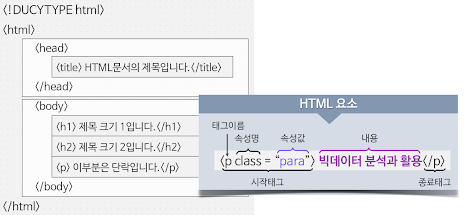

In [2]:
from PIL import Image
Image.open("태그요소.png")

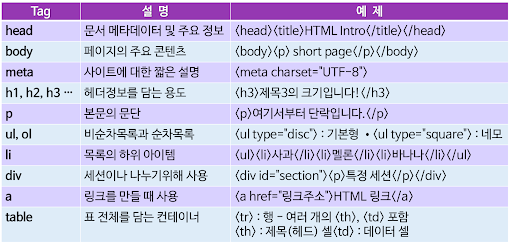

In [3]:
Image.open("태그종류.png")

In [4]:
html_doc ='''<html><head><title>웹크롤링 연습</title></head>
<body>
<p class="title"><b><h1>HTML 연습</h1></b></p>
<p class="link">인터넷 링크를 작성하는 방법은
<a class="blog" href='https://ai-bigdataanalysis.blogspot.com/' id="link1">인공지능 기반 덱스트 데이터 분석 블로그</a>와
<a class="wikidocs" href="https://wikidocs.net/book/6280" id="link2">인공지능 기반 빅데이터 자연어 처리와 통계 분석</a>처럼
HTML 링크로 작성할 수 있습니다.
</p>
<p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서
<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.
</p>
</body></html>
'''

In [5]:
with open('웹크롤링 연습.html','w') as f:
  f.write(html_doc)

Html 요소 구조 : 태그이름, 시작태그, 속성명, 속성값, 내용, 종료태그

## 4.1.3 웹 크롤링을 위한 파이썬 라이브러리 소개

In [6]:
!pip install bs4

In [7]:
from bs4 import BeautifulSoup as bs
html_tag ='''<p class='para'>빅데이터 분석과 활용</p>'''
soup = bs(html_tag, 'html.parser')
print(soup.find("p").text)
print(soup.select_one("p").get("class"))

빅데이터 분석과 활용
['para']


# 04.2 정적 수집도구 Requests와 Urllib 라이브러리 활용하기

## 4.2.1 로봇배제 기준 확인

해당 홈페이지 명에 robots.txt를 추가시켜서 웹브라우져를 실행시키면 확인 가능

In [8]:
# 로봇배제 기준 확인
import requests
resp = requests.get("https://ai-bigdataanalysis.blogspot.com/robots.txt")
print(resp.text)

User-agent: Mediapartners-Google
Disallow: 

User-agent: *
Disallow: /search
Allow: /

Sitemap: https://ai-bigdataanalysis.blogspot.com/sitemap.xml




## 4.2.2 Requests 라이브러리 활용

In [9]:
import requests
r = requests.get('https://ai-bigdataanalysis.blogspot.com')
print(r.encoding)
print(r.headers['Expires'])
print(r.headers['Content-Type'])
r.headers

UTF-8
Sat, 13 Apr 2024 18:25:23 GMT
text/html; charset=UTF-8


{'Content-Type': 'text/html; charset=UTF-8', 'Expires': 'Sat, 13 Apr 2024 18:25:23 GMT', 'Date': 'Sat, 13 Apr 2024 18:25:23 GMT', 'Cache-Control': 'private, max-age=0', 'Last-Modified': 'Sun, 24 Mar 2024 13:48:59 GMT', 'ETag': 'W/"1b14a7ed028edd7a4da7aedebcc2cfb70db820c4c9194f4703d495a82f2f2437"', 'Content-Encoding': 'gzip', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'Server': 'GSE', 'Transfer-Encoding': 'chunked'}

In [10]:
# html = requests.get('https://blog.naver.com/enjoystat', auth=('naver_id', 'naver_pass'))
# print(html.text[:200])

## 4.2.3 urllib 라이브러리 활용하기

참조 : https://docs.python.org/ko/3.10/library/urllib.request.html

In [11]:
# 식별된 encoding방법을 참고하여 decoding하여 바이트를 한글 text로 변환
from urllib.request import urlopen
html = urlopen('https://ai-bigdataanalysis.blogspot.com/2024/03/blog-post.html')
print(html.headers.get_content_charset())
html_doc = html.read().decode()
print(html_doc[:200])

utf-8
<!DOCTYPE html>
<html class='v2' dir='ltr' lang='ko'>
<head>
<link href='https://www.blogger.com/static/v1/widgets/3566091532-css_bundle_v2.css' rel='stylesheet' type='text/css'/>
<meta content='width


# 04.3 Beautifulsoup 라이브러리 활용하여 HTML 문서 파싱하기

*웹페이지에서 소스크드를 보는 방법은 F12를 누르면 볼수 있다.

참조 : https://www.crummy.com/software/BeautifulSoup/bs4/doc/

한글참조 : https://www.crummy.com/software/BeautifulSoup/bs4/doc.ko/

## 4.3.1 HTML 문서 파싱

In [12]:
from bs4 import BeautifulSoup as bs
with open('웹크롤링 연습.html','r') as f:
  html_doc = f.read()
soup = bs(html_doc, 'html.parser')
print(soup)
print(soup.prettify())

<html><head><title>웹크롤링 연습</title></head>
<body>
<p class="title"><b><h1>HTML 연습</h1></b></p>
<p class="link">인터넷 링크를 작성하는 방법은
<a class="blog" href="https://ai-bigdataanalysis.blogspot.com/" id="link1">인공지능 기반 덱스트 데이터 분석 블로그</a>와
<a class="wikidocs" href="https://wikidocs.net/book/6280" id="link2">인공지능 기반 빅데이터 자연어 처리와 통계 분석</a>처럼
HTML 링크로 작성할 수 있습니다.
</p>
<p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서
<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.
</p>
</body></html>

<html>
 <head>
  <title>
   웹크롤링 연습
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    <h1>
     HTML 연습
    </h1>
   </b>
  </p>
  <p class="link">
   인터넷 링크를 작성하는 방법은
   <a class="blog" href="https://ai-bigdataanalysis.blogspot.com/" id="link1">
    인공지능 기반 덱스트 데이터 분석 블로그
   </a>
   와
   <a class="wikidocs" href="https://wikidocs.net/book/6280" id="link2">
    인공지능 기반 빅데이터 자연어 처리와 통계 분석
   </a>
   처럼
HTML 링크로 작성할 수 있습니다.
  </p>
  <p class="story">
   그리고 HTML 문서는 글자의 크기도 조정 가능해서
   <h2>
    크게
   </h2>
   작성할 수도 

In [13]:
print('제목 추출:', soup.title.text)
print('상위 태그이름 식별:', soup.title.parent.name)
print('첫번째 p 태그 추출:', soup.p)
print('속성값 추출:', soup.a['href'])

제목 추출: 웹크롤링 연습
상위 태그이름 식별: head
첫번째 p 태그 추출: <p class="title"><b><h1>HTML 연습</h1></b></p>
속성값 추출: https://ai-bigdataanalysis.blogspot.com/


In [14]:
# find_all과 select
for p in soup.find_all('p'):
    print(p.text)
for p in soup.select('p'):
    print(p.text)

HTML 연습
인터넷 링크를 작성하는 방법은
인공지능 기반 덱스트 데이터 분석 블로그와
인공지능 기반 빅데이터 자연어 처리와 통계 분석처럼
HTML 링크로 작성할 수 있습니다.

그리고 HTML 문서는 글자의 크기도 조정 가능해서
크게작성할 수도 있고, 작게 작성할 수도 있습니다.

HTML 연습
인터넷 링크를 작성하는 방법은
인공지능 기반 덱스트 데이터 분석 블로그와
인공지능 기반 빅데이터 자연어 처리와 통계 분석처럼
HTML 링크로 작성할 수 있습니다.

그리고 HTML 문서는 글자의 크기도 조정 가능해서
크게작성할 수도 있고, 작게 작성할 수도 있습니다.



## 4.3.2 태그, 속성과 속성값을 활용하는 find 함수 활용

* select는 CSS 선택자 이용
* find는 태그와 속성, 속성값 이용
* find = select_one, find_all = select

In [15]:
# find는 태그 이름, 속성으로 특정
print(soup.find_all('p'))
print(soup.find('p'))
print(soup.find(class_='title'))
print(soup.find(attrs = {'class':'python'}))
print(soup.find('a', {'id':'link1'}))
print(soup.find(attrs = {'id':'link2'}))

[<p class="title"><b><h1>HTML 연습</h1></b></p>, <p class="link">인터넷 링크를 작성하는 방법은
<a class="blog" href="https://ai-bigdataanalysis.blogspot.com/" id="link1">인공지능 기반 덱스트 데이터 분석 블로그</a>와
<a class="wikidocs" href="https://wikidocs.net/book/6280" id="link2">인공지능 기반 빅데이터 자연어 처리와 통계 분석</a>처럼
HTML 링크로 작성할 수 있습니다.
</p>, <p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서
<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.
</p>]
<p class="title"><b><h1>HTML 연습</h1></b></p>
<p class="title"><b><h1>HTML 연습</h1></b></p>
None
<a class="blog" href="https://ai-bigdataanalysis.blogspot.com/" id="link1">인공지능 기반 덱스트 데이터 분석 블로그</a>
<a class="wikidocs" href="https://wikidocs.net/book/6280" id="link2">인공지능 기반 빅데이터 자연어 처리와 통계 분석</a>


In [16]:
print(soup.find('p').find('h1').text)
print(soup.find_all('p')[0].get('class'))

HTML 연습
['title']


## 4.3.3 CSS 선택자를 이용하는 Select 함수 활용

In [17]:
# select_one는 css로 특정
print(soup.select('p'))
print(soup.select_one('p'))
print(soup.select_one('.title'))
print(soup.select_one('.python'))
print(soup.select_one('a#link1'))
print(soup.select_one('#link2'))

[<p class="title"><b><h1>HTML 연습</h1></b></p>, <p class="link">인터넷 링크를 작성하는 방법은
<a class="blog" href="https://ai-bigdataanalysis.blogspot.com/" id="link1">인공지능 기반 덱스트 데이터 분석 블로그</a>와
<a class="wikidocs" href="https://wikidocs.net/book/6280" id="link2">인공지능 기반 빅데이터 자연어 처리와 통계 분석</a>처럼
HTML 링크로 작성할 수 있습니다.
</p>, <p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서
<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.
</p>]
<p class="title"><b><h1>HTML 연습</h1></b></p>
<p class="title"><b><h1>HTML 연습</h1></b></p>
None
<a class="blog" href="https://ai-bigdataanalysis.blogspot.com/" id="link1">인공지능 기반 덱스트 데이터 분석 블로그</a>
<a class="wikidocs" href="https://wikidocs.net/book/6280" id="link2">인공지능 기반 빅데이터 자연어 처리와 통계 분석</a>


In [18]:
# find_all과 select 사용법 비교
print(soup.select_one('p > #link1').text)
print(soup.select('a')[1].get('id'))
print(soup.select('p')[1].text)

인공지능 기반 덱스트 데이터 분석 블로그
link2
인터넷 링크를 작성하는 방법은
인공지능 기반 덱스트 데이터 분석 블로그와
인공지능 기반 빅데이터 자연어 처리와 통계 분석처럼
HTML 링크로 작성할 수 있습니다.



# 04.4 동적 수집도구 Selenium 라이브러리 활용하기

## 4.4.1 Selenium 라이브러리 설치

In [19]:
# selenium 설치 : 38초 소요
!apt install chromium-chromedriver
!pip install chromedriver_autoinstaller selenium
import sys
import chromedriver_autoinstaller
sys.path.insert(0,'/usr/bin/chromedriver')
chromedriver_autoinstaller.install()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  apparmor chromium-browser libfuse3-3 liblzo2-2 libudev1 snapd squashfs-tools systemd-hwe-hwdb
  udev
Suggested packages:
  apparmor-profiles-extra apparmor-utils fuse3 zenity | kdialog
The following NEW packages will be installed:
  apparmor chromium-browser chromium-chromedriver libfuse3-3 liblzo2-2 snapd squashfs-tools
  systemd-hwe-hwdb udev
The following packages will be upgraded:
  libudev1
1 upgraded, 9 newly installed, 0 to remove and 44 not upgraded.
Need to get 27.3 MB of archives.
After this operation, 114 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 apparmor amd64 3.0.4-2ubuntu2.3 [595 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 liblzo2-2 amd64 2.10-2build3 [53.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 squashfs-tools amd64 1:4.5-3

In [20]:
# 명령어 형태 참조
# from selenium.webdriver.common.by import By
# driver.find_element(By.XPATH, '//button[text()="Some text"]')
# driver.find_element(By.XPATH, '//button')
# driver.find_element(By.ID, 'loginForm')
# driver.find_element(By.LINK_TEXT, 'Continue')
# driver.find_element(By.PARTIAL_LINK_TEXT, 'Conti')
# driver.find_element(By.NAME, 'username')
# driver.find_element(By.TAG_NAME, 'h1')
# driver.find_element(By.CLASS_NAME, 'content')
# driver.find_element(By.CSS_SELECTOR, 'p.content')
# driver.find_elements(By.ID, 'loginForm')
# driver.find_elements(By.CLASS_NAME, 'content'

## 4.4.2 Selenium 라이브러리를 이용한 웹 크롤링

In [21]:
# 라이브러리 import
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=chrome_options)

In [22]:
# 크롤링 사이트
driver.get("https://wikidocs.net/book/6280")
time.sleep(3)
driver.implicitly_wait(1)
driver.find_element(By.XPATH, '//*[@id="kw"]').send_keys('웹크롤링')
# driver.find_element(By.CSS_SELECTOR, "body > div > div.content.row > div.col-sm-3 > div > div > div.toc.toc-checker > div.row > div > div > div.pull-right > button.btn.btn-xs.btn-default.find-btn").click()
driver.find_element(By.XPATH, "/html/body/div/div/div[1]/div/div/div[1]/div[1]/div/div/div[2]/button[1]").click()
time.sleep(3)
news_titles = driver.find_elements(By.CLASS_NAME, "find-title")
for i in news_titles:
    title = i.text
    print(title)

04.1 웝 크롤링과 HTML 구조의 이해
04.3 Beautifulsoup 라이브러리 활용하여 HTML 문서 파싱하기
04.4 동적 수집도구 Selenium 라이브러리 활용하기
04장 웹크롤링에 의한 데이터 수집과 저장
09.2 문서의 수량화 표현과 요약 : DTM, TF-IDF
15.3 데이터 준비 단계


In [23]:
driver.close()

# 04.5 YES24 베스트셀러 웹 크롤링 사례

## 4.5.1 크롤링 대상 사이트의 로봇배제 기준과 HTML 구조 파악

In [24]:
# 필요한 라이브러리 선언, urlopen과 bs로 parsing
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import pandas as pd
html = urlopen('http://www.yes24.com/24/Category/BestSeller?CategoryNumber=001')
soup = bs(html, "html.parser")
table = soup.find('ul', {'id' : 'yesBestList'})
# print(table.prettify())
print(table.text[:200])







1

위 상승













미리보기





강력추천 오늘의책





[도서]
불변의 법칙
절대 변하지 않는 것들에 대한 23가지 이야기
[ 양장 ]
불변의 법칙 새창이동



모건 하우절 저/이수경 역
                            
서삼독
2024년 02월


구매혜택

                    


## 4.5.2 url 링크를 리스트로 정리하기

In [25]:
# 주간 베스트에 해당하는 링크 url을 찾아서 리스트에 담기
book_urls =[]
for i, cont in enumerate(table.find_all('a', {'class' : 'gd_name'})):
    # if i >2 : break
    link = 'http://www.yes24.com/'+cont.get('href')
    print(link)
    book_urls.append(link)
book_urls


http://www.yes24.com//Product/Goods/124999476
http://www.yes24.com//Product/Goods/125491624
http://www.yes24.com//Product/Goods/125295101
http://www.yes24.com//Product/Goods/125576919
http://www.yes24.com//Product/Goods/123675187
http://www.yes24.com//Product/Goods/117014613
http://www.yes24.com//Product/Goods/122120495
http://www.yes24.com//Product/Goods/125871480
http://www.yes24.com//Product/Goods/90926731
http://www.yes24.com//Product/Goods/125752452
http://www.yes24.com//Product/Goods/125709308
http://www.yes24.com//Product/Goods/125184439
http://www.yes24.com//Product/Goods/123400303
http://www.yes24.com//Product/Goods/125558276
http://www.yes24.com//Product/Goods/96547408
http://www.yes24.com//Product/Goods/124926484
http://www.yes24.com//Product/Goods/124043812
http://www.yes24.com//Product/Goods/125384202
http://www.yes24.com//Product/Goods/125905738
http://www.yes24.com//Product/Goods/125905365
http://www.yes24.com//Product/Goods/124043802
http://www.yes24.com//Product/Goods/

['http://www.yes24.com//Product/Goods/124999476',
 'http://www.yes24.com//Product/Goods/125491624',
 'http://www.yes24.com//Product/Goods/125295101',
 'http://www.yes24.com//Product/Goods/125576919',
 'http://www.yes24.com//Product/Goods/123675187',
 'http://www.yes24.com//Product/Goods/117014613',
 'http://www.yes24.com//Product/Goods/122120495',
 'http://www.yes24.com//Product/Goods/125871480',
 'http://www.yes24.com//Product/Goods/90926731',
 'http://www.yes24.com//Product/Goods/125752452',
 'http://www.yes24.com//Product/Goods/125709308',
 'http://www.yes24.com//Product/Goods/125184439',
 'http://www.yes24.com//Product/Goods/123400303',
 'http://www.yes24.com//Product/Goods/125558276',
 'http://www.yes24.com//Product/Goods/96547408',
 'http://www.yes24.com//Product/Goods/124926484',
 'http://www.yes24.com//Product/Goods/124043812',
 'http://www.yes24.com//Product/Goods/125384202',
 'http://www.yes24.com//Product/Goods/125905738',
 'http://www.yes24.com//Product/Goods/125905365',
 '

## 4.5.3 url을 순회하면서 데이터 수집하기

In [26]:
# url별로 순회하면서 딕셔너리 데이터로 담아서 list에 담기: 5분 소요
dic = []
for index, book_url in enumerate(book_urls):
    html = urlopen(book_url)
    soup = bs(html, "html.parser")
    title = soup.find('h2', {'class':'gd_name'}).text
    author = soup.find('span', {'class': 'gd_auth'}).find('a').text
    pub = soup.find('span', {'class': 'gd_pub'}).text
    price = soup.find('span', {'class':'nor_price'}).text
    print(title, author, price)
    dic.append({'제목':title,'저자' : author,'출판사' : pub, '가격':price, 'Link':book_url})
pd.DataFrame(dic)

불변의 법칙 모건 하우절 22,500원
일류의 조건 사이토 다카시 17,820원
나를 소모하지 않는 현명한 태도에 관하여 마티아스 뇔케 16,020원
꽃길이 따로 있나, 내 삶이 꽃인 것을 오평선 15,120원
나는 메트로폴리탄 미술관의 경비원입니다 패트릭 브링리 15,750원
세이노의 가르침 세이노(SayNo) 6,480원
마흔에 읽는 쇼펜하우어 강용수 15,300원
이상한 과자 가게 전천당 20 히로시마 레이코 11,700원
삼체 1~3 세트 류츠신 60,300원
에그박사 12 에그박사 13,050원
2024 제15회 젊은작가상 수상작품집 김멜라 6,930원
깨진 틈이 있어야 그 사이로 빛이 들어온다 프리드리히 니체 16,920원
이처럼 사소한 것들 클레어 키건 12,420원
알사탕 제조법 백희나 9,000원
돈의 심리학 (30만 부 기념 스페셜 에디션)  모건 하우절 17,820원
나는 나의 스무 살을 가장 존중한다 이하영 16,200원
ETS 토익 정기시험 기출문제집 1000 Vol. 4 RC ETS 17,820원
찌그러져도 동그라미입니다 김창완 16,020원
스킵과 로퍼 8 타카마츠 미사키 5,400원
여행의 이유 김영하 15,120원
ETS 토익 정기시험 기출문제집 1000 Vol. 4 LC ETS 17,820원
이은경쌤의 초등어휘일력 365  이은경 16,920원
하루 한 장 나의 어휘력을 위한 필사 노트 유선경 21,420원
2024 해커스 GSAT 삼성직무적성검사 통합 기본서 최신기출유형+실전모의고사 해커스 취업교육연구소 21,600원


,제목,저자,출판사,가격,Link
0,불변의 법칙,모건 하우절,서삼독,"22,500원",http://www.yes24.com//Product/Goods/124999476
1,일류의 조건,사이토 다카시,필름,"17,820원",http://www.yes24.com//Product/Goods/125491624
2,나를 소모하지 않는 현명한 태도에 관하여,마티아스 뇔케,퍼스트펭귄,"16,020원",http://www.yes24.com//Product/Goods/125295101
3,"꽃길이 따로 있나, 내 삶이 꽃인 것을",오평선,포레스트북스,"15,120원",http://www.yes24.com//Product/Goods/125576919
4,나는 메트로폴리탄 미술관의 경비원입니다,패트릭 브링리,웅진지식하우스,"15,750원",http://www.yes24.com//Product/Goods/123675187
5,세이노의 가르침,세이노(SayNo),데이원,"6,480원",http://www.yes24.com//Product/Goods/117014613
6,마흔에 읽는 쇼펜하우어,강용수,유노북스,"15,300원",http://www.yes24.com//Product/Goods/122120495
7,이상한 과자 가게 전천당 20,히로시마 레이코,길벗스쿨,"11,700원",http://www.yes24.com//Product/Goods/125871480
8,삼체 1~3 세트,류츠신,자음과모음,"60,300원",http://www.yes24.com//Product/Goods/90926731
9,에그박사 12,에그박사,미래엔아이세움,"13,050원",http://www.yes24.com//Product/Goods/125752452


In [27]:
# 데이터 확인
dic

[{'제목': '불변의 법칙',
  '저자': '모건 하우절',
  '출판사': '서삼독',
  '가격': '22,500원',
  'Link': 'http://www.yes24.com//Product/Goods/124999476'},
 {'제목': '일류의 조건',
  '저자': '사이토 다카시',
  '출판사': '필름',
  '가격': '17,820원',
  'Link': 'http://www.yes24.com//Product/Goods/125491624'},
 {'제목': '나를 소모하지 않는 현명한 태도에 관하여',
  '저자': '마티아스 뇔케',
  '출판사': '퍼스트펭귄',
  '가격': '16,020원',
  'Link': 'http://www.yes24.com//Product/Goods/125295101'},
 {'제목': '꽃길이 따로 있나, 내 삶이 꽃인 것을',
  '저자': '오평선',
  '출판사': '포레스트북스',
  '가격': '15,120원',
  'Link': 'http://www.yes24.com//Product/Goods/125576919'},
 {'제목': '나는 메트로폴리탄 미술관의 경비원입니다',
  '저자': '패트릭 브링리',
  '출판사': '웅진지식하우스',
  '가격': '15,750원',
  'Link': 'http://www.yes24.com//Product/Goods/123675187'},
 {'제목': '세이노의 가르침',
  '저자': '세이노(SayNo)',
  '출판사': '데이원',
  '가격': '6,480원',
  'Link': 'http://www.yes24.com//Product/Goods/117014613'},
 {'제목': '마흔에 읽는 쇼펜하우어',
  '저자': '강용수',
  '출판사': '유노북스',
  '가격': '15,300원',
  'Link': 'http://www.yes24.com//Product/Goods/122120495'},
 {'제목': '이상한 과자 가게 전

In [28]:
# 판다스 데이터 프레임으로 전환
pd.DataFrame(dic)

,제목,저자,출판사,가격,Link
0,불변의 법칙,모건 하우절,서삼독,"22,500원",http://www.yes24.com//Product/Goods/124999476
1,일류의 조건,사이토 다카시,필름,"17,820원",http://www.yes24.com//Product/Goods/125491624
2,나를 소모하지 않는 현명한 태도에 관하여,마티아스 뇔케,퍼스트펭귄,"16,020원",http://www.yes24.com//Product/Goods/125295101
3,"꽃길이 따로 있나, 내 삶이 꽃인 것을",오평선,포레스트북스,"15,120원",http://www.yes24.com//Product/Goods/125576919
4,나는 메트로폴리탄 미술관의 경비원입니다,패트릭 브링리,웅진지식하우스,"15,750원",http://www.yes24.com//Product/Goods/123675187
5,세이노의 가르침,세이노(SayNo),데이원,"6,480원",http://www.yes24.com//Product/Goods/117014613
6,마흔에 읽는 쇼펜하우어,강용수,유노북스,"15,300원",http://www.yes24.com//Product/Goods/122120495
7,이상한 과자 가게 전천당 20,히로시마 레이코,길벗스쿨,"11,700원",http://www.yes24.com//Product/Goods/125871480
8,삼체 1~3 세트,류츠신,자음과모음,"60,300원",http://www.yes24.com//Product/Goods/90926731
9,에그박사 12,에그박사,미래엔아이세움,"13,050원",http://www.yes24.com//Product/Goods/125752452
